First, we want to create some code that will show us that the average total time for the random sampling equal across a variety of cycles and iterations.

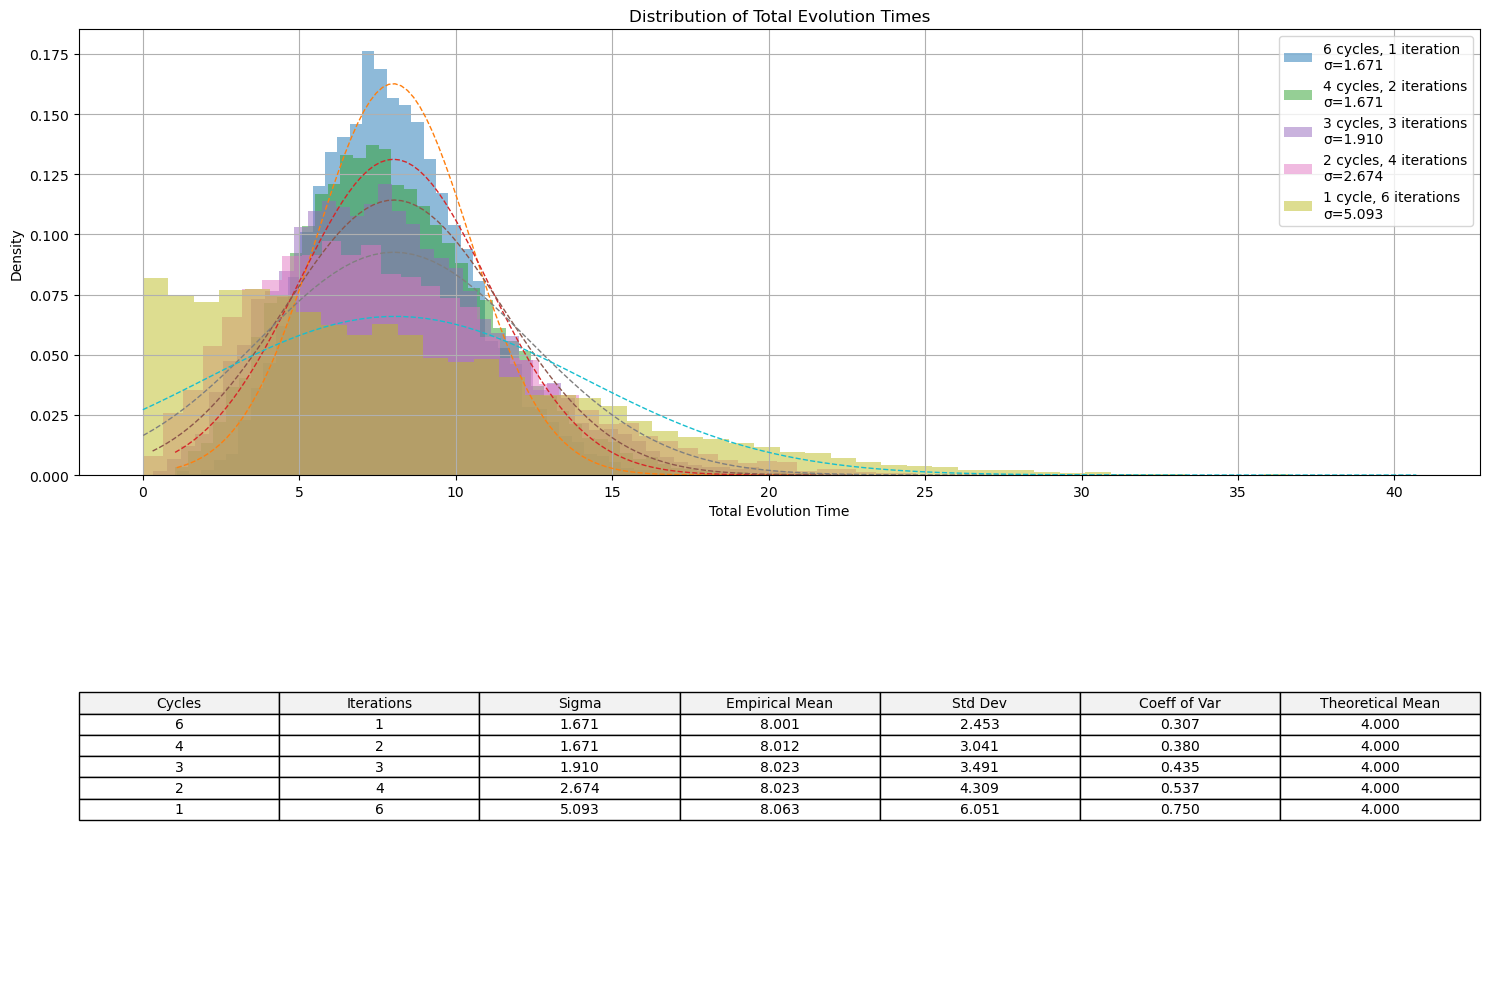


Detailed Statistics:
--------------------------------------------------------------------------------

6 cycles, 1 iteration:
Configuration: 6 cycles, 1 iterations
Required σ: 1.671
Mean total time: 8.001 (theoretical: 4.000)
Standard deviation: 2.453
Coefficient of variation: 0.307

4 cycles, 2 iterations:
Configuration: 4 cycles, 2 iterations
Required σ: 1.671
Mean total time: 8.012 (theoretical: 4.000)
Standard deviation: 3.041
Coefficient of variation: 0.380

3 cycles, 3 iterations:
Configuration: 3 cycles, 3 iterations
Required σ: 1.910
Mean total time: 8.023 (theoretical: 4.000)
Standard deviation: 3.491
Coefficient of variation: 0.435

2 cycles, 4 iterations:
Configuration: 2 cycles, 4 iterations
Required σ: 2.674
Mean total time: 8.023 (theoretical: 4.000)
Standard deviation: 4.309
Coefficient of variation: 0.537

1 cycle, 6 iterations:
Configuration: 1 cycles, 6 iterations
Required σ: 5.093
Mean total time: 8.063 (theoretical: 4.000)
Standard deviation: 6.051
Coefficient of v

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def calculate_evolution_times(n_cycles, iterations_per_cycle, sigma, n_samples=10000):
    """
    Calculate total evolution times for given number of cycles and iterations.
    Returns both the total times and the individual evolution steps for analysis.
    """
    total_times = np.zeros(n_samples)
    all_steps = []  # Store individual time steps for analysis
    
    for sample in range(n_samples):
        time = 0
        sample_steps = []
        for cycle in range(n_cycles):
            t = abs(np.random.normal(0, sigma))
            cycle_steps = []
            for i in range(iterations_per_cycle):
                step_time = t / (2**i)
                time += step_time
                cycle_steps.append(step_time)
            sample_steps.extend(cycle_steps)
        total_times[sample] = time
        all_steps.append(sample_steps)
    
    theoretical_mean = n_cycles * np.sqrt(2/np.pi) * sigma * (1 - 1/2**iterations_per_cycle)
    
    return total_times, theoretical_mean, np.array(all_steps)

def calculate_required_sigma(n_cycles, iterations, target_time):
    """Calculate required sigma to achieve target average total time."""
    return target_time / (n_cycles * np.sqrt(2/np.pi) * (1 - 1/2**iterations))

# Define combinations that demonstrate different approaches
# Format: (cycles, iterations, description)
combinations = [
    (6, 1, "6 cycles, 1 iteration"),
    (4, 2, "4 cycles, 2 iterations"),
    (3,3, "3 cycles, 3 iterations"), 
    (2, 4, "2 cycles, 4 iterations"),             
    (1, 6, "1 cycle, 6 iterations"),

]

target_time = 4.0  # Target average total time
n_samples = 10000

# Calculate and plot results
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of total times
plt.subplot(2, 1, 1)
results = []
for cycles, iterations, label in combinations:
    # Calculate required sigma
    sigma = calculate_required_sigma(cycles, iterations, target_time)
    
    # Generate data
    times, theo_mean, steps = calculate_evolution_times(cycles, iterations, sigma)
    
    # Plot histogram
    plt.hist(times, bins=50, alpha=0.5, density=True, label=f"{label}\nσ={sigma:.3f}")
    
    # Fit and plot normal distribution
    mu, std = stats.norm.fit(times)
    x = np.linspace(min(times), max(times), 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, '--', linewidth=1)
    
    results.append({
        'label': label,
        'cycles': cycles,
        'iterations': iterations,
        'sigma': sigma,
        'mean': np.mean(times),
        'std': np.std(times),
        'cv': np.std(times)/np.mean(times),
        'theo_mean': theo_mean
    })

plt.xlabel('Total Evolution Time')
plt.ylabel('Density')
plt.title('Distribution of Total Evolution Times')
plt.legend()
plt.grid(True)

# Plot 2: Statistics table
plt.subplot(2, 1, 2)
plt.axis('off')

cell_text = []
for r in results:
    cell_text.append([
        f"{r['cycles']}", 
        f"{r['iterations']}", 
        f"{r['sigma']:.3f}",
        f"{r['mean']:.3f}",
        f"{r['std']:.3f}",
        f"{r['cv']:.3f}",
        f"{r['theo_mean']:.3f}"
    ])

columns = ['Cycles', 'Iterations', 'Sigma', 
           'Empirical Mean', 'Std Dev', 
           'Coeff of Var', 'Theoretical Mean']

plt.table(cellText=cell_text, colLabels=columns, 
         loc='center', cellLoc='center',
         colColours=['#f2f2f2']*len(columns))

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print("-" * 80)
for r in results:
    print(f"\n{r['label']}:")
    print(f"Configuration: {r['cycles']} cycles, {r['iterations']} iterations")
    print(f"Required σ: {r['sigma']:.3f}")
    print(f"Mean total time: {r['mean']:.3f} (theoretical: {r['theo_mean']:.3f})")
    print(f"Standard deviation: {r['std']:.3f}")
    print(f"Coefficient of variation: {r['cv']:.3f}")

Cycles: 1, Iterations: 5
Sigma: 12.9374
RMS: 25.0416

Cycles: 2, Iterations: 4
Sigma: 6.6843
RMS: 22.6761

Cycles: 3, Iterations: 3
Sigma: 4.7745
RMS: 21.7758

Cycles: 4, Iterations: 2
Sigma: 4.1777
RMS: 21.4258

Cycles: 5, Iterations: 1
Sigma: 5.0133
RMS: 21.0687



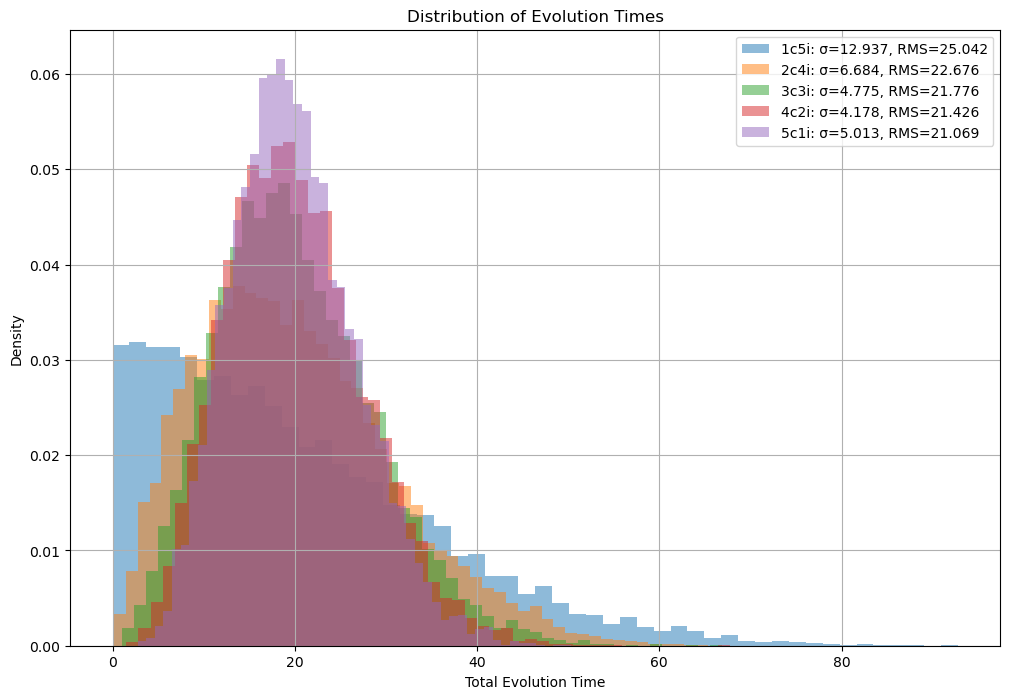

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_required_sigma(n_cycles, iterations, target_time):
    return target_time / (n_cycles * np.sqrt(2/np.pi) * (1 - 1/2**iterations))

def generate_times(n_cycles, iterations, sigma, n_samples=10000):
    total_times = np.zeros(n_samples)
    for sample in range(n_samples):
        time = 0
        for cycle in range(n_cycles):
            t = abs(np.random.normal(0, sigma))
            for i in range(iterations):
                time += t / (2**i)
        total_times[sample] = time
    return total_times

# Parameters
target_time = 10
combinations = [
    (1, 5), (2, 4), (3, 3), (4, 2), (5, 1)
]

plt.figure(figsize=(12, 8))

for cycles, iterations in combinations:
    sigma = calculate_required_sigma(cycles, iterations, target_time)
    times = generate_times(cycles, iterations, sigma)
    rms = np.sqrt(np.mean(times**2))
    
    plt.hist(times, bins=50, alpha=0.5, density=True, 
             label=f"{cycles}c{iterations}i: σ={sigma:.3f}, RMS={rms:.3f}")
    
    print(f"Cycles: {cycles}, Iterations: {iterations}")
    print(f"Sigma: {sigma:.4f}")
    print(f"RMS: {rms:.4f}\n")

plt.xlabel('Total Evolution Time')
plt.ylabel('Density')
plt.title('Distribution of Evolution Times')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import helperfunctions as hf

from qiskit_aer.primitives import Sampler
import numpy as np
from tqdm import tqdm

# Setup parameters
iterations_list = [5,4,3,2,1]
cycles_list = [1,2,3,4,5]
sigma_list = [0.647, 0.339, 0.239, 0.209, 0.251]

# Define inter-peak regions
range1 = np.arange(-6, 0.1, 0.1)
range2 = np.arange(3.5, 6.1, 0.1)
targetenergies = np.concatenate([range1, range2])

# Parameters for sampling
timeresamples = 10
shots_per_same_time = [10, 50,100,200,300,400,500,600,700,800,900,1000]

# Circuit parameters
num_sites = 2
J_input = 4.0
U_input = 1.0

# Initialize results storage
results = []

for i in range(len(cycles_list)):
    # Lists to store probabilities for all energies at this (cycles, iterations)
    all_probabilities = []
    
    circuit, target, time, si_time = hf.create_rodeo_circuit(num_sites = 2, J_input = 4.0, U_input = 1.0, cycles = cycles_list[i],
                            super_iterations= iterations_list[i], trotter_steps = 5)
    
    print(f"\nExecuting for {cycles_list[i]} cycles with {iterations_list[i]} iterations:")
    # Loop through all target energies with progress bar
    for energy in tqdm(targetenergies, desc="Processing energies", ncols=100):
        targ_energy = {target: energy}
        
        # Removed the print statement since we now have the progress bar
        
        probabilities_0 = []
        for _ in range(timeresamples):
            tsamples = np.abs((sigma_list[i] * np.random.randn(cycles_list[i]))).tolist()
            time_parameters = dict(zip(time, tsamples))
            superiteration_parameters = hf.generate_superiteration_times(tsamples, 
                                                                    superiterations=iterations_list[i],
                                                                    si_time=si_time)

            # Assigns target energy and time values to parameters
            circuit1 = circuit.assign_parameters(time_parameters, inplace=False)
            circuit2 = circuit1.assign_parameters(targ_energy, inplace=False)
            circuit3 = circuit2.assign_parameters(superiteration_parameters, inplace=False)
            
            # Runs simulation of circuit
            sampler = Sampler()
            result = sampler.run(circuit3, shots = shots_per_same_time[0]).result()
            quasi_dists = result.quasi_dists
            
            # Extract probability of 0 bitcount
            for dist in quasi_dists:
                probabilities_0.append(dist.get(0, 0))
        
        # Average probability for this energy
        avg_prob_0 = np.mean(probabilities_0)
        all_probabilities.append(avg_prob_0)
    
    # Calculate statistics across all energies for this (cycles, iterations)
    max_prob = np.max(all_probabilities)
    mean_prob = np.mean(all_probabilities)
    
    # Store results
    results.append({
        'cycles': cycles_list[i],
        'iterations': iterations_list[i],
        'max_probability': max_prob,
        'mean_probability': mean_prob
    })


Executing for 1 cycles with 5 iterations:


Processing energies:   1%|▍                                          | 1/87 [00:08<11:41,  8.16s/it]


KeyboardInterrupt: 

In [12]:
import helperfunctions as hf
from qiskit_aer.primitives import Sampler
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Setup parameters
iterations_list = [5,4,3,2,1]
cycles_list = [1,2,3,4,5]
sigma_list = [0.647, 0.339, 0.239, 0.209, 0.251]
shots_per_same_time = [10, 50, 100, 500, 1000]

# Define inter-peak regions
range1 = np.arange(-6, 0.1, 1)
range2 = np.arange(3.5, 6.1, 1)
targetenergies = np.concatenate([range1, range2])

# Parameters for sampling
timeresamples = 10

# Circuit parameters
num_sites = 2
J_input = 4.0
U_input = 1.0

# Initialize results storage with shots dimension
results = {shots: [] for shots in shots_per_same_time}

for i in range(len(cycles_list)):
    print(f"\nExecuting for {cycles_list[i]} cycles with {iterations_list[i]} iterations:")
    
    circuit, target, time, si_time = hf.create_rodeo_circuit(num_sites=2, J_input=4.0, U_input=1.0, 
                                                           cycles=cycles_list[i],
                                                           super_iterations=iterations_list[i], 
                                                           trotter_steps=5)
    
    for shots in shots_per_same_time:
        all_probabilities = []
        
        for energy in tqdm(targetenergies, desc=f"Processing shots={shots}", ncols=100):
            targ_energy = {target: energy}
            probabilities_0 = []
            
            for _ in range(timeresamples):
                tsamples = np.abs((sigma_list[i] * np.random.randn(cycles_list[i]))).tolist()
                time_parameters = dict(zip(time, tsamples))
                superiteration_parameters = hf.generate_superiteration_times(tsamples, 
                                                                        superiterations=iterations_list[i],
                                                                        si_time=si_time)

                circuit1 = circuit.assign_parameters(time_parameters, inplace=False)
                circuit2 = circuit1.assign_parameters(targ_energy, inplace=False)
                circuit3 = circuit2.assign_parameters(superiteration_parameters, inplace=False)
                
                sampler = Sampler()
                result = sampler.run(circuit3, shots=shots).result()
                quasi_dists = result.quasi_dists
                
                for dist in quasi_dists:
                    probabilities_0.append(dist.get(0, 0))
            
            avg_prob_0 = np.mean(probabilities_0)
            all_probabilities.append(avg_prob_0)
        
        max_prob = np.max(all_probabilities)
        mean_prob = np.mean(all_probabilities)
        results[shots].append({
            'cycles': cycles_list[i],
            'iterations': iterations_list[i],
            'max_probability': max_prob,
            'mean_probability': mean_prob
        })


Executing for 1 cycles with 5 iterations:


Processing shots=1000: 100%|████████████████████████████████████████| 10/10 [01:03<00:00,  6.35s/it]



Executing for 2 cycles with 4 iterations:


Processing shots=1000: 100%|████████████████████████████████████████| 10/10 [01:39<00:00,  9.99s/it]



Executing for 3 cycles with 3 iterations:


Processing shots=1000: 100%|████████████████████████████████████████| 10/10 [01:55<00:00, 11.52s/it]



Executing for 4 cycles with 2 iterations:


Processing shots=1000: 100%|████████████████████████████████████████| 10/10 [02:08<00:00, 12.82s/it]



Executing for 5 cycles with 1 iterations:


Processing shots=1000: 100%|████████████████████████████████████████| 10/10 [01:51<00:00, 11.13s/it]


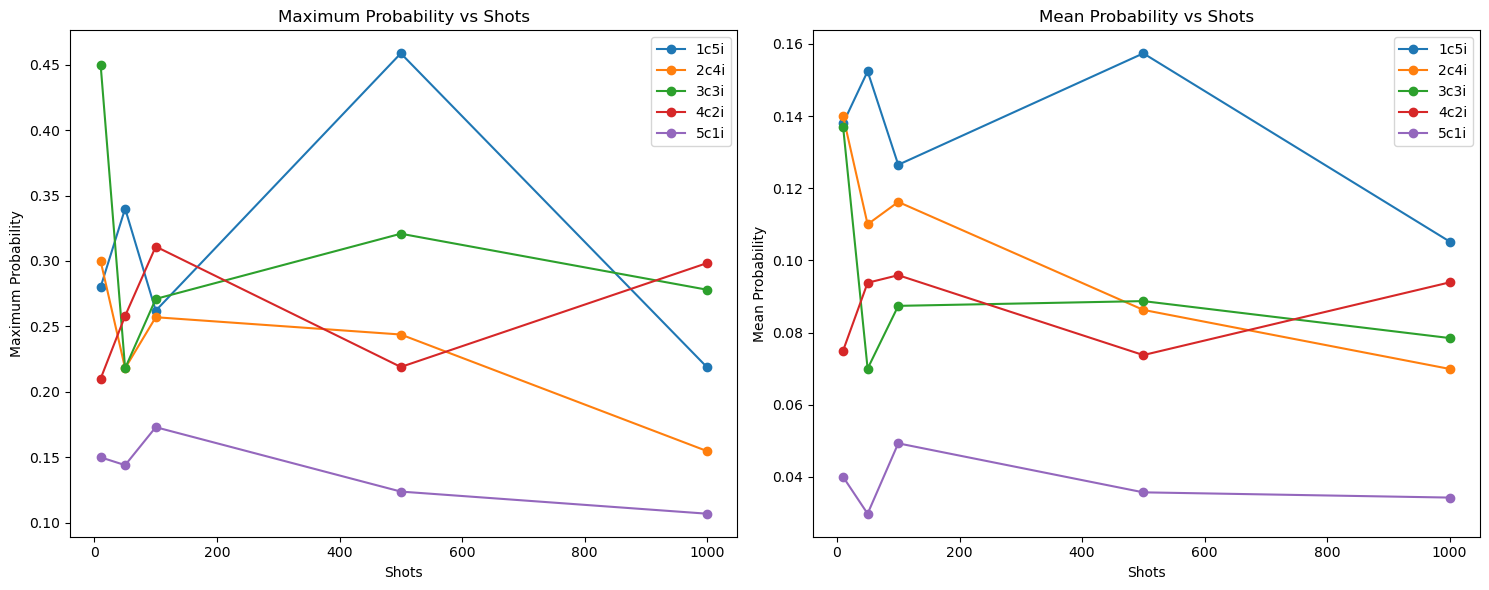

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

for i in range(len(cycles_list)):
    max_probs = [results[shots][i]['max_probability'] for shots in shots_per_same_time]
    mean_probs = [results[shots][i]['mean_probability'] for shots in shots_per_same_time]
    
    ax1.plot(shots_per_same_time, max_probs, label=f"{cycles_list[i]}c{iterations_list[i]}i", marker='o')
    ax2.plot(shots_per_same_time, mean_probs, label=f"{cycles_list[i]}c{iterations_list[i]}i", marker='o')

ax1.set(xlabel='Shots', ylabel='Maximum Probability', title='Maximum Probability vs Shots')
ax2.set(xlabel='Shots', ylabel='Mean Probability', title='Mean Probability vs Shots')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

In [10]:
len(all_probabilities)

87

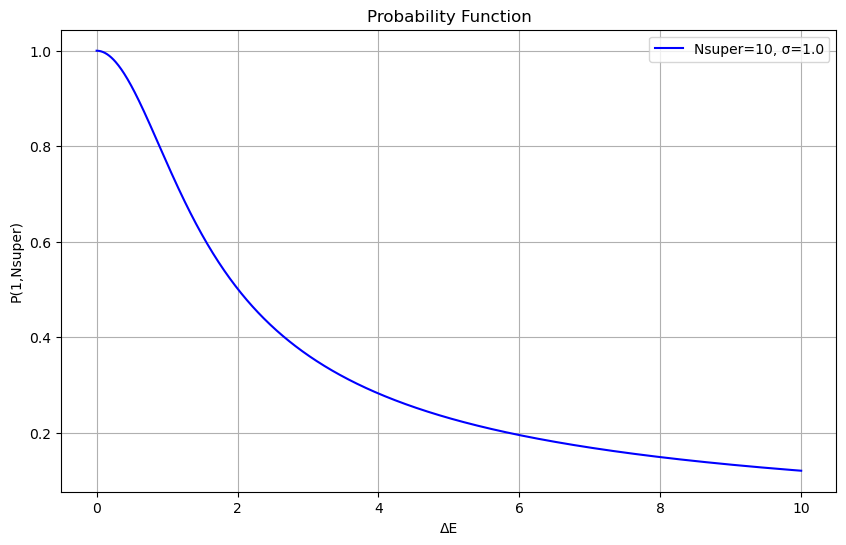

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_probability(delta_E, Nsuper, sigma):
    prob = 0
    for n in range(2**Nsuper + 1):
        term = (1 / 2**(2*Nsuper-1)) * (2**Nsuper - n)
        exponent = -(delta_E**2 * sigma**2 * n**2) / (2**(2*Nsuper-1))
        prob += term * np.exp(exponent)
    return prob - 1/2**Nsuper

def plot_probability(Nsuper, sigma):
    delta_E = np.linspace(0, 10, 1000)
    probs = [calculate_probability(de, Nsuper, sigma) for de in delta_E]
    
    plt.figure(figsize=(10, 6))
    plt.plot(delta_E, probs, 'b-', label=f'Nsuper={Nsuper}, σ={sigma}')
    plt.xlabel('ΔE')
    plt.ylabel('P(1,Nsuper)')
    plt.title('Probability Function')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
Nsuper = 10
sigma = 1.0
plot_probability(Nsuper, sigma)

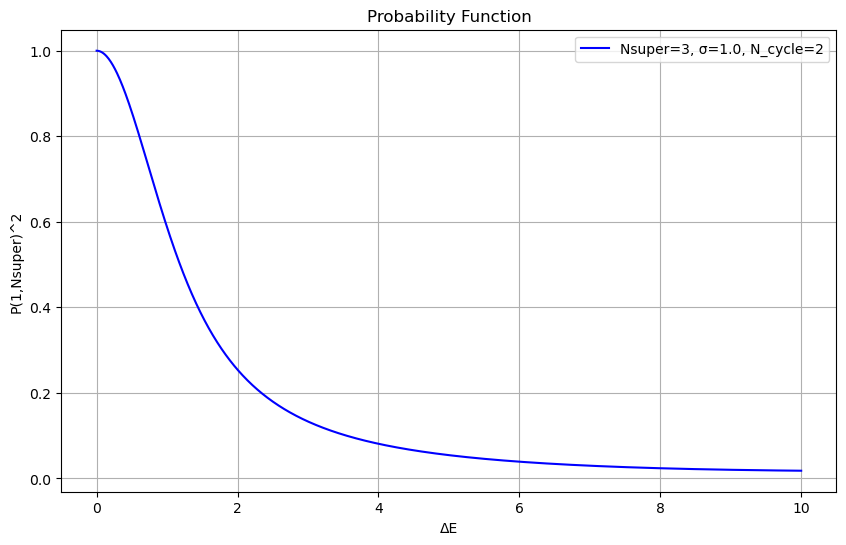

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_probability(delta_E, Nsuper, sigma, N_cycle):
    prob = 0
    for n in range(2**Nsuper + 1):
        term = (1 / 2**(2*Nsuper-1)) * (2**Nsuper - n)
        exponent = -(delta_E**2 * sigma**2 * n**2) / (2**(2*Nsuper-1))
        prob += term * np.exp(exponent)
    base_prob = prob - 1/2**Nsuper
    return base_prob**N_cycle

def plot_probability(Nsuper, sigma, N_cycle):
    delta_E = np.linspace(0, 10, 1000)
    probs = [calculate_probability(de, Nsuper, sigma, N_cycle) for de in delta_E]
    
    plt.figure(figsize=(10, 6))
    plt.plot(delta_E, probs, 'b-', label=f'Nsuper={Nsuper}, σ={sigma}, N_cycle={N_cycle}')
    plt.xlabel('ΔE')
    plt.ylabel(f'P(1,Nsuper)^{N_cycle}')
    plt.title('Probability Function')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
Nsuper = 3
sigma = 1.0
N_cycle = 2
plot_probability(Nsuper, sigma, N_cycle)

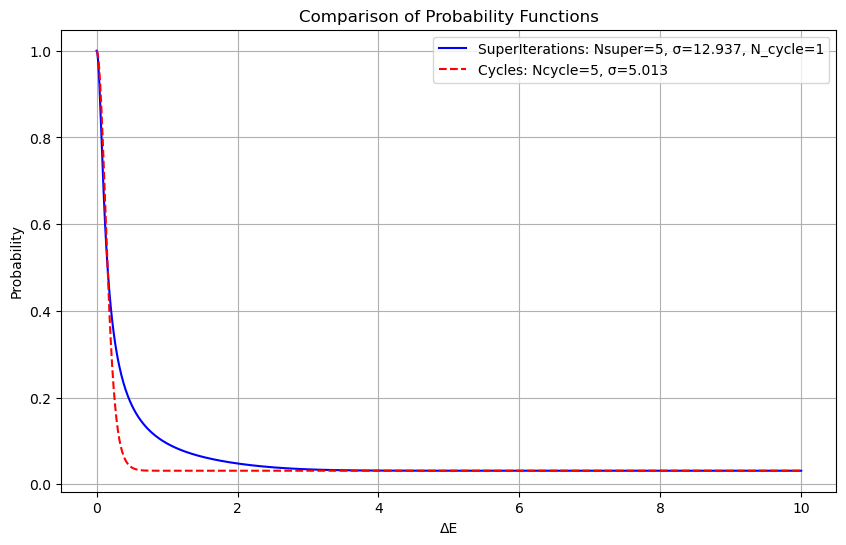

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_probability1(delta_E, Nsuper, sigma, N_cycle):
    prob = 0
    for n in range(2**Nsuper + 1):
        term = (1 / 2**(2*Nsuper-1)) * (2**Nsuper - n)
        exponent = -(delta_E**2 * sigma**2 * n**2) / (2**(2*Nsuper-1))
        prob += term * np.exp(exponent)
    base_prob = prob - 1/2**Nsuper
    return base_prob**N_cycle

def calculate_probability2(delta_E, sigma, N):
    return ((1 + np.exp(-(delta_E**2) * sigma**2 / 2)) / 2)**N

def plot_both_probabilities(Nsuper, sigma1, sigma2,  Ncyclesuper, Ncycle):
    delta_E = np.linspace(0, 10, 1000)
    probs1 = [calculate_probability1(de, Nsuper, sigma1, Ncyclesuper) for de in delta_E]
    probs2 = [calculate_probability2(de, sigma2, Ncycle) for de in delta_E]
    
    plt.figure(figsize=(10, 6))
    plt.plot(delta_E, probs1, 'b-', label=f'SuperIterations: Nsuper={Nsuper}, σ={sigma1}, N_cycle={Ncyclesuper}')
    plt.plot(delta_E, probs2, 'r--', label=f'Cycles: Ncycle={Ncycle}, σ={sigma2}')
    plt.xlabel('ΔE')
    plt.ylabel('Probability')
    plt.title('Comparison of Probability Functions')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
Nsuper = 5
sigma1 = 12.937
sigma2 = 5.013
N_cyclesuper = 1
N_cycle = 5

plot_both_probabilities(Nsuper, sigma1, sigma2, N_cyclesuper, N_cycle)